<a href="https://colab.research.google.com/github/VictoriaUsman/Python/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np
from scipy import misc
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import pandas as pd
import seaborn as sns

In [158]:
data = pd.read_csv("cost_revenue_dirty.csv")

In [159]:
data.shape

(5391, 6)

In [160]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [167]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [175]:
data.duplicated().values.any()

np.False_

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [174]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5386,False
5387,False
5388,False
5389,False


In [180]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   object        
 4   USD_Worldwide_Gross    5391 non-null   object        
 5   USD_Domestic_Gross     5391 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 252.8+ KB


In [187]:
data.USD_Production_Budget = data.USD_Production_Budget.str.replace(",", "")

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   object        
 4   USD_Worldwide_Gross    5391 non-null   object        
 5   USD_Domestic_Gross     5391 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 252.8+ KB


In [190]:
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   object        
 5   USD_Domestic_Gross     5391 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 252.8+ KB


In [192]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.str.replace(",", "")

In [193]:
data.USD_Domestic_Gross = data.USD_Domestic_Gross.str.replace("$", "")

In [194]:
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)

In [196]:
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.str.replace(",", "")

In [197]:
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.str.replace("$", "")

In [198]:
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)

In [219]:
data.info()

AttributeError: 'builtin_function_or_method' object has no attribute 'info'

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [216]:
print(data)

<built-in method format of str object at 0x7c80e6967810>


AttributeError: 'builtin_function_or_method' object has no attribute 'head'

In [236]:
pd.options.display.float_format = '{:.0f}'.format


In [226]:
data = pd.read_csv("cost_revenue_dirty.csv")

In [227]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [238]:
columns_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]

for column in columns_to_clean:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1278163693.py:4: SyntaxWarning: invalid escape sequence '\$'
  data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)


In [280]:
international_release = data.query("USD_Worldwide_Gross == 0")

In [281]:
len(international_release)

357

In [306]:
date_today = pd.Timestamp("1990-11-10")
print(date_today)

1990-11-10 00:00:00


In [296]:
data["Release_Date"] >= pd.Timestamp("2025-11-10")


TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

In [297]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"], errors='coerce')


In [300]:
print(data["Release_Date"])

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]


In [307]:
print(data.Movie_Title[data.Release_Date >= date_today])

581                         Home Alone
582                         Predator 2
583                   Kindergarten Cop
584            The Godfather: Part III
585                        Going Under
                     ...              
5386                               Meg
5387                           Aquaman
5388                       Singularity
5389            Hannibal the Conqueror
5390    Story of Bonnie and Clyde, The
Name: Movie_Title, Length: 4810, dtype: object


In [320]:
losing_money = round(len(data.loc[data.USD_Production_Budget > data.USD_Worldwide_Gross]) / data.shape[0]*100, 2)

In [322]:
print(f"Data show that, we have {losing_money}% losing movies from the dataset")

Data show that, we have 37.36% losing movies from the dataset


<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

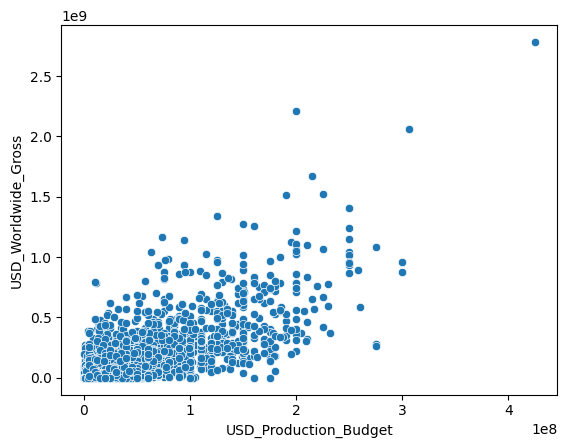

In [323]:
sns.scatterplot(data=data, x="USD_Production_Budget", y="USD_Worldwide_Gross")


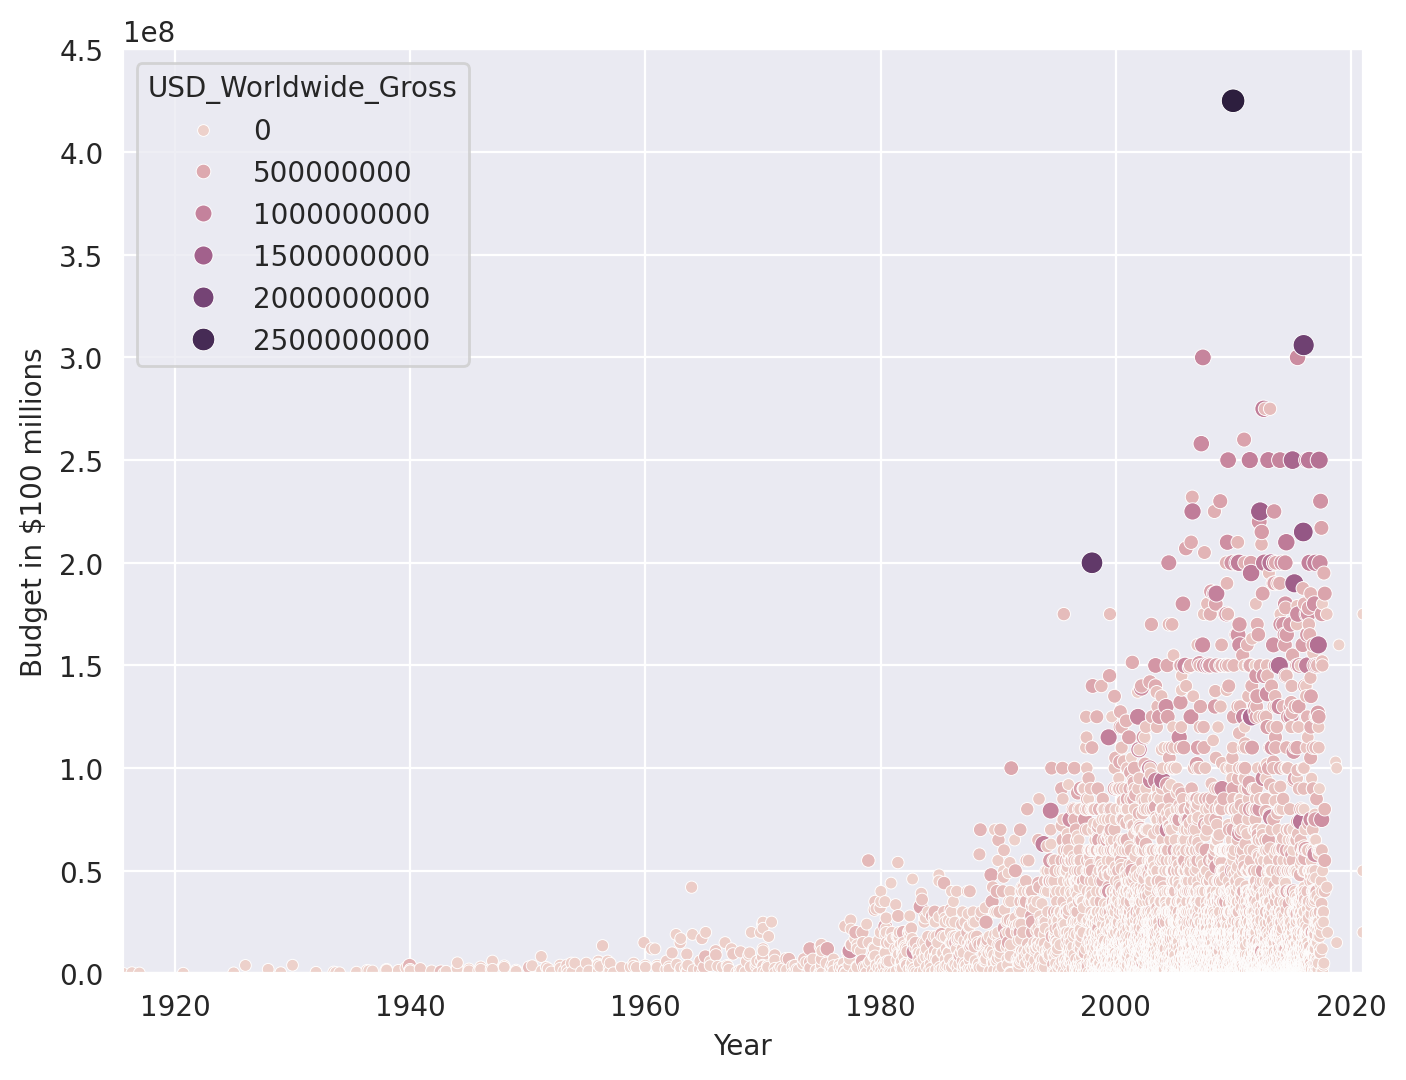

In [347]:
plt.figure(figsize=(8,6), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data.Release_Date.min(), data.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
plt.show()

In [349]:
data["Year in Decade"] = None

In [350]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Year in Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,None
1,5140,1916-05-09,Intolerance,385907,0,0,None
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,None
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,None
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,None


In [355]:
data['Year in Decade'] = pd.DatetimeIndex(data['Release_Date']).year // 10 * 10

In [356]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Year in Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [404]:
old = data[data["Year in Decade"] <= 1960]

In [405]:
new = data[data["Year in Decade"] > 1960]

In [406]:
old.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Year in Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


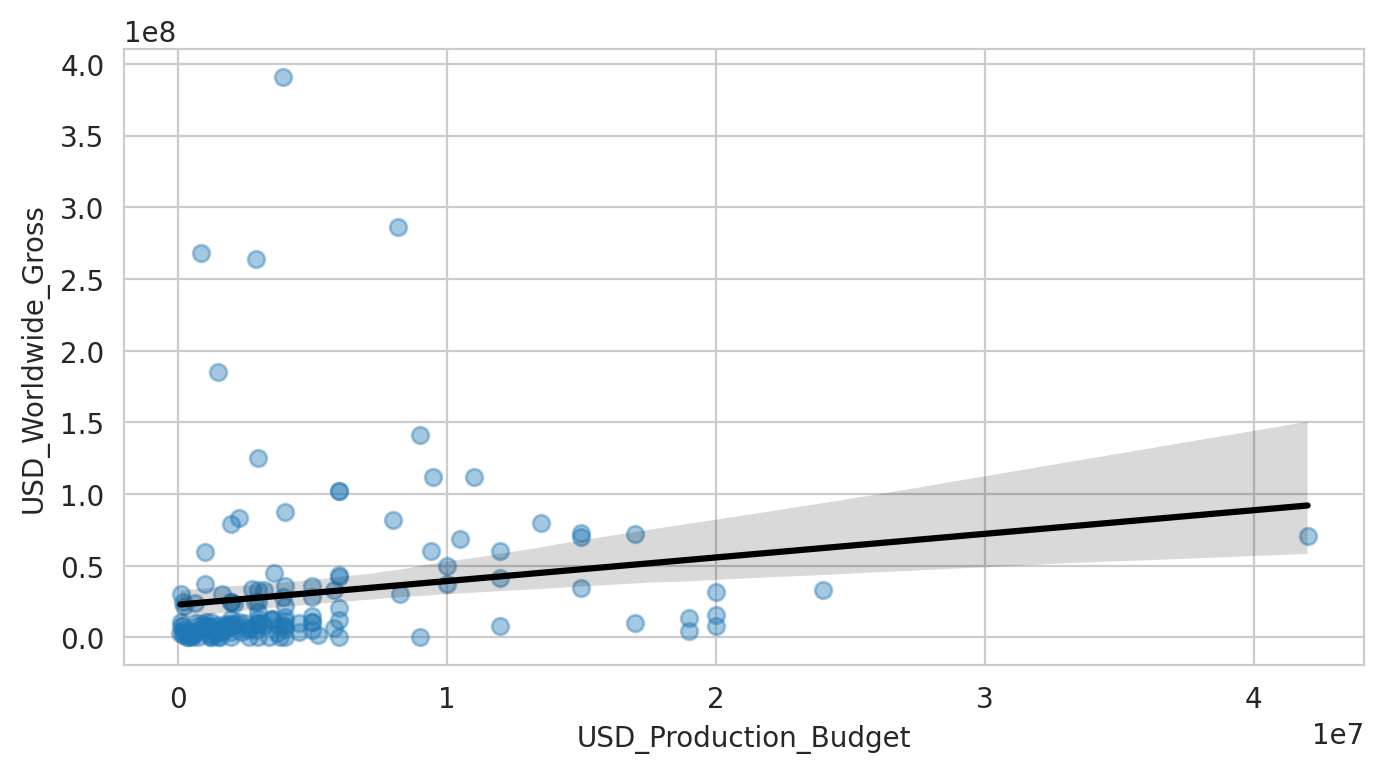

In [409]:


plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old,
            x="USD_Production_Budget",
            y="USD_Worldwide_Gross",
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})




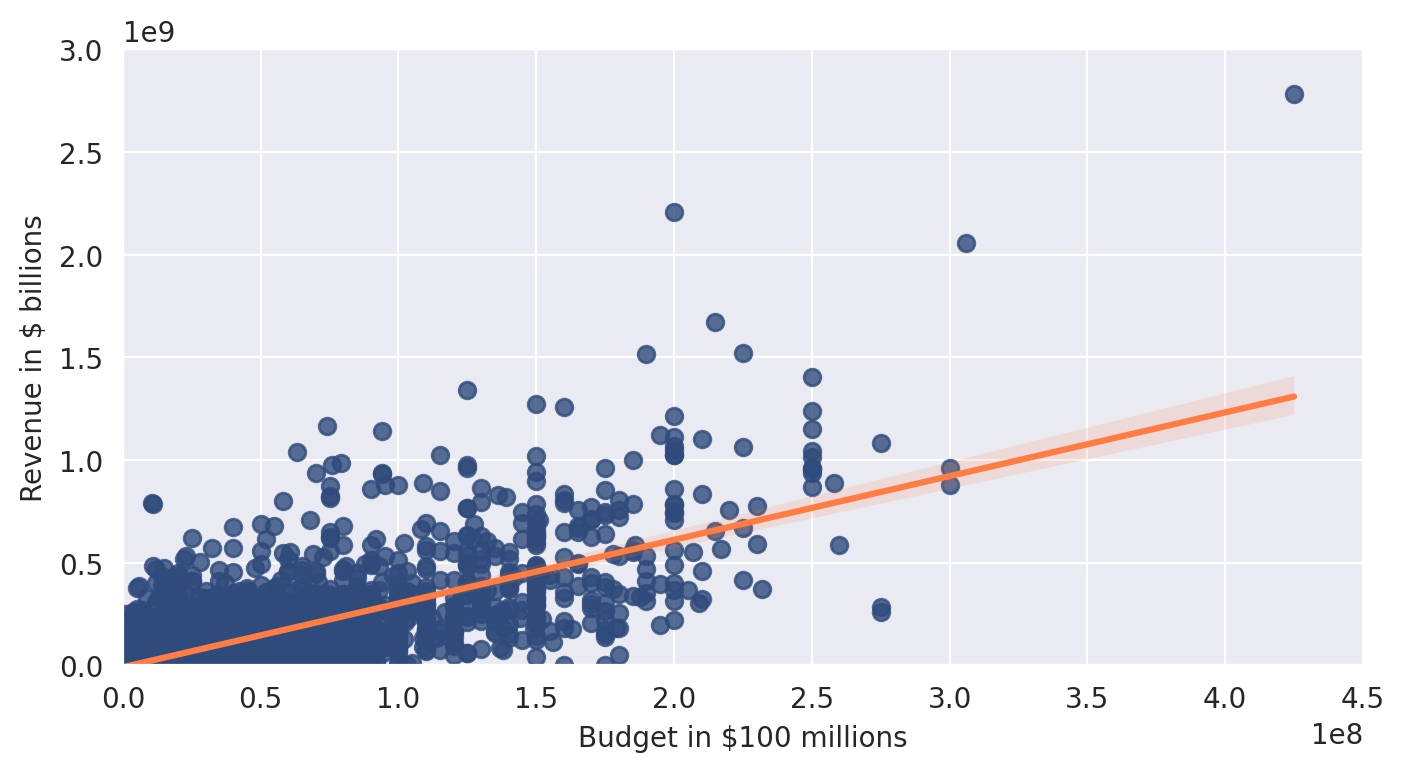

In [418]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.8},
                   line_kws = {'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

In [423]:
import plotly.express as px

fig = px.scatter(
    old,
    x="USD_Production_Budget",
    y="USD_Worldwide_Gross",
    hover_data=["Movie_Title", "USD_Worldwide_Gross"],  # columns to show on hover
    trendline="ols",  # adds a linear regression line
    opacity=0.4        # like alpha in Seaborn
)

fig.update_layout(
    title="Production Budget vs Worldwide Gross (Old Films)",
    xaxis_title="Production Budget (USD)",
    yaxis_title="Worldwide Gross (USD)",
    template="plotly_white",  # similar to Seaborn whitegrid
    width=800,
    height=400
)

fig.show()


In [431]:
from plotly.graph_objs import Line
from sklearn.linear_model import LinearRegression
X = pd.DataFrame(old, columns=['USD_Production_Budget'])
y = pd.DataFrame(old, columns=['USD_Worldwide_Gross'])
regression = LinearRegression()
regression.fit(X, y)
print(regression.coef_)
print(regression.intercept_)

[[1.64771314]]
[22821538.63508039]


In [441]:
regression.score(X, y)

0.02937258620576877

Testing a budget of 350M

In [443]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a {budget} film is around ${revenue_estimate:.10}.')

The estimated revenue for a 350000000 film is around $600000000.0.
